In [6]:
import numpy as np
import matplotlib.pyplot as plt

### Esercizio 1
Nel file `covid-19_gen1.txt` è presente l'RNA di un virus SARS-COV-2. L'RNA è una sequenza in cui si alternano 4 simboli (detti nucleotidi): A, T, C, G.
L'RNA del  virus SARS-COV-2 contiene 29903 nucleotidi. Leggi il file e crea un array di Numpy contenente i 29903 elementi, uno per ogni nucleotide secondo l'ordine contenuto nel file.

Utilizza Numpy per:
1. calcolare la frequenza assoluta di ogni nucleotide;
2. calcolare la frequenza assoluta della sequenza A,T,G;
4. sapendo che la sequenza A,T,G,T,T,T,G,T,T,T,T,T sta all'inzio del segmento di RNA che codifica la proteina spike, individuare se la proteina spike è presente nell'RNA: in caso affermativo ottenere la posizione iniziale della proteina spike all'interno dell'array. *SUGGERIMENTO*: costruisci la matrice contenente tutte le possibili sequenze di 12 nucleotidi, nella quale ogni riga rappresenta una sequenza consecutiva di 12 nucleotidi.

In [2]:
l = []
with open("./covid-19_gen1.txt","r") as f:
    righe = f.readlines()
for riga in righe:
    for c in riga[:-1]:
        l.append(c)
array = np.array(l)

In [3]:
frequenze_assolute = np.unique(array,return_counts=True)
frequenze_assolute

(array(['A', 'C', 'G', 'T'], dtype='<U1'),
 array([8954, 5492, 5863, 9594], dtype=int64))

In [6]:
check = np.logical_and(array == "A", np.roll(array,-1) == "T")
sequenze_ATG = np.logical_and(check, np.roll(array,-2) == "G")
frequenza_ATG = array[sequenze_ATG].shape[0]
frequenza_ATG

725

In [7]:
n = "ATGTTTGTTTT"
matrice = np.random.choice(("A","T","C","G"),(4092,12))
matrice

array([['G', 'A', 'A', ..., 'G', 'A', 'T'],
       ['A', 'C', 'C', ..., 'T', 'A', 'C'],
       ['T', 'T', 'G', ..., 'C', 'T', 'C'],
       ...,
       ['C', 'A', 'C', ..., 'A', 'G', 'T'],
       ['A', 'T', 'T', ..., 'G', 'A', 'G'],
       ['G', 'A', 'A', ..., 'G', 'C', 'A']], dtype='<U1')

### Esercizio 2
Il file `prezzi.cvs` contiene le serie storiche mensili dei prezzi di alcuni generi alimentari dal Settembre 2011 a Dicembre 2016. Caricare all'interno di opportuni array di Numpy soltanto le serie dei prezzi utili a rispondere alle domande seguenti.

1. Per il periodo Settembre 2011 - Dicembre 2016 calcola il prezzo di una spesa composta da:
    - 5kg di Farina di frumento
    - 1 l di Latte fresco
    - 1 kg di Caffè tostato
    - 0.5 kg di Parmigiano Reggiano
2. Per la spesa del punto 1 calcola se ci sono dei minimi locali nel prezzo e se si quando (anno, mese).

3. Traccia un grafico che mostri l'andamento del prezzo del Caffè tostato (gr. 1000).

4. Calcola un array con le variazioni di prezzo mensile per il Caffè tostato (gr. 1000).

5. Calcola un array con le variazioni di prezzo mensile per il Burro (gr. 1000).

6. Traccia un grafico a dispersione che mostri la variazione di prezzo mensile per il Caffè tostato (gr. 1000) rispetto a quella del Burro (gr. 1000).

### Leggo il file

In [13]:
spese = {"anno":[],"mese":[],"SpesaTotale":[]}
with open("./prezzi.csv","r") as f:
    righe = f.readlines()
#righe[0].split(";")

### Punto 1

In [14]:
for riga in righe[1:]:
    riga = riga[:-1].split(";")
    spese["anno"].append(int(riga[0]))
    spese["mese"].append(riga[1])
    spese["SpesaTotale"].append(5*float(riga[9])+10*float(riga[11])+float(riga[6])+0.5*float(riga[17]))
spese['SpesaTotale']

[44.39,
 44.39,
 43.64,
 43.47,
 43.485,
 43.47,
 43.295,
 43.225,
 43.64000000000001,
 44.150000000000006,
 43.81,
 43.82000000000001,
 43.760000000000005,
 43.7,
 43.47,
 43.485,
 43.47,
 43.295,
 43.225,
 43.64000000000001,
 44.150000000000006,
 43.81,
 43.82000000000001,
 43.760000000000005,
 43.7,
 43.809999999999995,
 43.699999999999996,
 44.63999999999999,
 44.379999999999995,
 44.57,
 44.71,
 44.37,
 44.275,
 44.33,
 44.0,
 44.114999999999995,
 44.345,
 44.315,
 44.345,
 44.385000000000005,
 44.25,
 43.730000000000004,
 43.644999999999996,
 43.665,
 43.66,
 43.87,
 44.195,
 42.245,
 42.215,
 42.255,
 41.39,
 41.29,
 41.32,
 41.31,
 40.745000000000005,
 41.160000000000004,
 41.23,
 40.915,
 40.885]

In [15]:
for key,lista in spese.items():
    spese[key] = np.array(lista)

### Punto 2

In [15]:
indici_minimi_locali = np.logical_and(spese["SpesaTotale"]<np.roll(spese["SpesaTotale"],1),spese['SpesaTotale']<np.roll(spese['SpesaTotale'],-1))
minimi_locali = spese["SpesaTotale"][indici_minimi_locali]
minimi_locali

array([43.47 , 43.225, 43.81 , 43.47 , 43.225, 43.81 , 43.7  , 43.7  ,
       44.38 , 44.275, 44.   , 44.315, 43.645, 43.66 , 42.215, 41.29 ,
       40.745, 40.885, 43.47 , 43.225, 43.81 , 43.47 , 43.225, 43.81 ,
       43.7  , 43.7  , 44.38 , 44.275, 44.   , 44.315, 43.645, 43.66 ,
       42.215, 41.29 , 40.745, 40.885])

### Punto 3

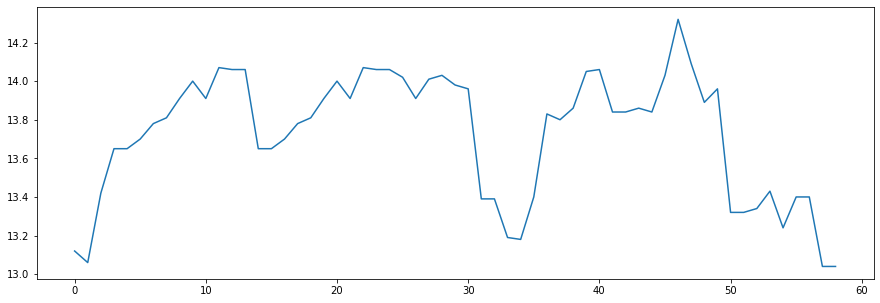

In [24]:
l = []
for riga in righe[1:]:
    riga = riga[:-1].split(";")
    l.append(float(riga[6]))
prezzi_caffe_tostato = np.array(l)
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(prezzi_caffe_tostato)
plt.show()

### Punto 4

In [28]:
variazioni_prezzi_caffe_tostato = prezzi_caffe_tostato - np.roll(prezzi_caffe_tostato,-1)
variazioni_prezzi_caffe_tostato

array([ 0.06, -0.36, -0.23,  0.  , -0.05, -0.08, -0.03, -0.1 , -0.09,
        0.09, -0.16,  0.01,  0.  ,  0.41,  0.  , -0.05, -0.08, -0.03,
       -0.1 , -0.09,  0.09, -0.16,  0.01,  0.  ,  0.04,  0.11, -0.1 ,
       -0.02,  0.05,  0.02,  0.57,  0.  ,  0.2 ,  0.01, -0.22, -0.43,
        0.03, -0.06, -0.19, -0.01,  0.22,  0.  , -0.02,  0.02, -0.19,
       -0.29,  0.23,  0.2 , -0.07,  0.64,  0.  , -0.02, -0.09,  0.19,
       -0.16,  0.  ,  0.36,  0.  , -0.08])

### Punto 5

In [31]:
l = []
for riga in righe[1:]:
    riga = riga[:-1].split(";")
    l.append(float(riga[5]))
prezzi_burro = np.array(l)
variazioni_prezzi_burro = prezzi_burro - np.roll(prezzi_burro,-1)
variazioni_prezzi_burro

array([ 0.08,  0.02, -0.19, -0.07,  0.02, -0.15,  0.12, -0.06, -0.12,
       -0.13, -0.04, -0.11, -0.02,  0.56, -0.07,  0.02, -0.15,  0.12,
       -0.06, -0.12, -0.13, -0.04, -0.11, -0.02,  0.09, -0.08, -0.05,
       -0.34, -0.15, -0.13,  0.  ,  0.  ,  0.16, -0.06,  0.36,  0.2 ,
       -0.19, -0.04,  0.  ,  0.1 ,  0.07,  0.  , -0.11, -0.01, -0.32,
        0.31,  0.22, -0.28,  0.11,  0.36, -0.08, -0.01,  0.11,  0.33,
       -0.12,  0.11, -0.03,  0.08,  0.04])

### Punto 6

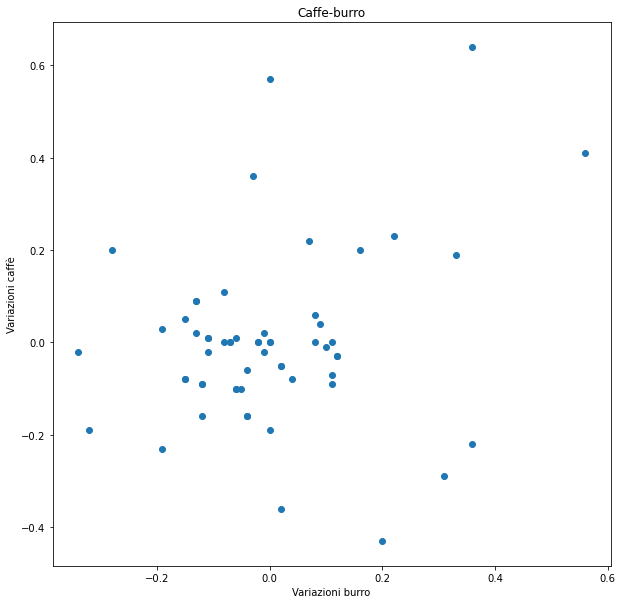

In [36]:
fig, ax = plt.subplots(figsize=(10,10))
ax.set_title("Caffe-burro")
ax.scatter(variazioni_prezzi_burro,variazioni_prezzi_caffe_tostato)
ax.set_xlabel("Variazioni burro")
ax.set_ylabel("Variazioni caffè")
plt.show()

### Esercizio 3
L'array `array_punti` è un array di Numpy come quello sottostante, contenente quattro coppie di coordinate spaziali intere scelte a caso, che rappresentano quattro punti nel piano. Essi sono i quattro vertici di una figura geometrica piana, letti in verso anti-orario. Facendo uso di Numpy:
1. crea una funzione che verifichi se la figura geometrica è un quadrilatero, un triangolo, un segmento oppure un punto;
2. crea una funzione che calcoli il perimetro della figura.

In [9]:
def check(punto):
    if punto[0] == True and punto[1] == True:
        return True
    else:
        return False

In [10]:
def controlla_punti_uguali(array_punti):
    check1 = array_punti == np.roll(array_punti,-2)
    check2 = array_punti == np.roll(array_punti,-4)
    check3 = array_punti == np.roll(array_punti,-6)
    punti_uguali = np.logical_or(np.logical_or(check1,check2),check3)
    c = 0
    for punto in punti_uguali:
        if check(punto):
            c += 1
    return c

In [11]:
def riconosci_figura_geomtrice(array_punti):
    punti_uguali = controlla_punti_uguali(array_punti)
    if punti_uguali == 4:
        figura = "Punto"
    elif punti_uguali == 3:
        figura = "Segmento"
    elif punti_uguali == 2:
        figura = "Triangolo"
    elif punti_uguali == 0 or punti_uguali == 1:
        figura = "Quadrilatero"
    return figura

In [17]:
array_punti= np.random.randint(0.,5,(4,2))
array_punti

array([[3, 4],
       [4, 3],
       [2, 2],
       [3, 2]])

In [18]:
riconosci_figura_geomtrice(array_punti)

'Quadrilatero'

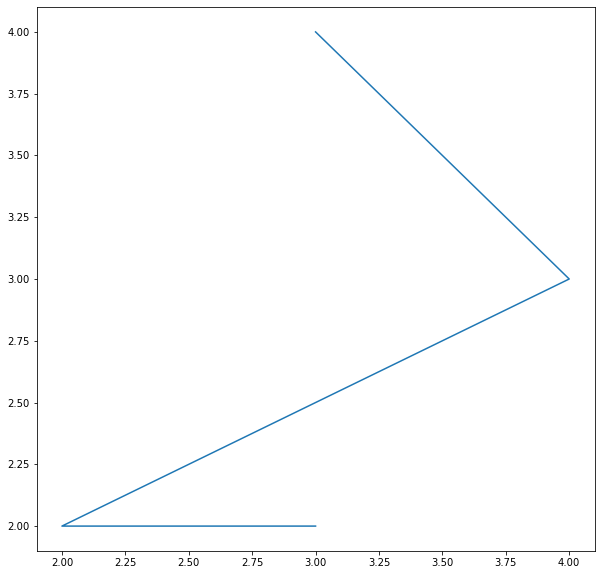

In [19]:
array_x = array_punti[:,0]
array_y = array_punti[:,1]
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(array_x,array_y)
plt.show()

### Esercizio 4 (BONUS)
Usa Numpy per calcolare una approssimazione dell'integrale definito della funzione f(x) = exp(-x^2) da 0 a 1. Suddividi l'intervallo [0,1] in n sotto-intervalli e per ogni sotto-intervallo approssima l'area sottesa dalla funzione con l'area del corrispondente rettangolo.
![rettangoli](rettangolo.png)
Calcola il risultato per n=10, 100, 10000, 100000.